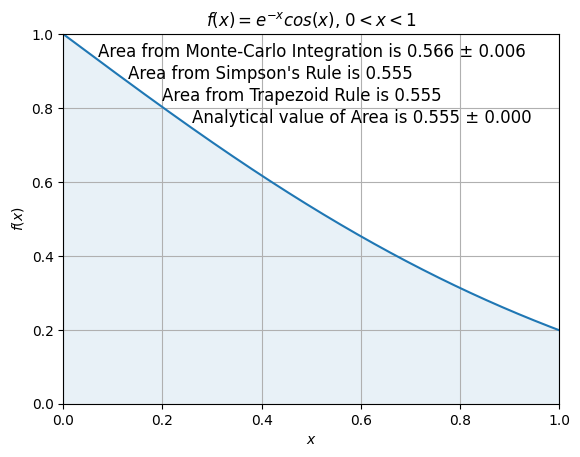

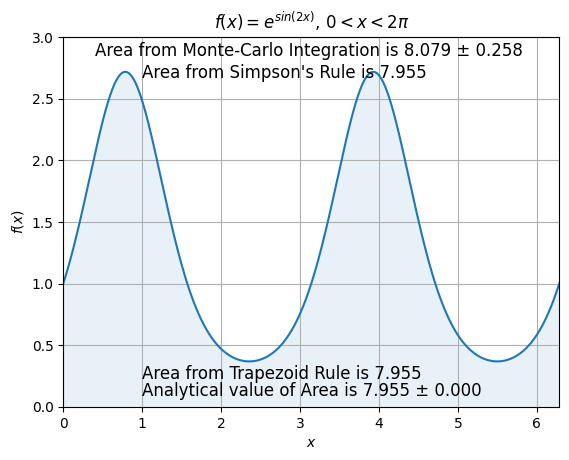

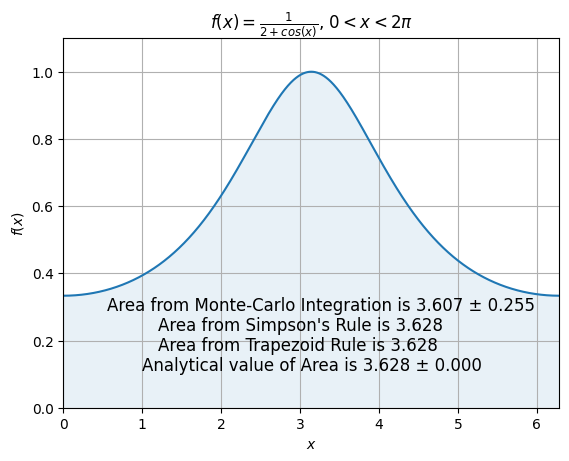

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, trapz, quad


# Define Functions
def I_a(x):
    return np.exp(-x) * np.cos(x)

def I_b(x):
    return np.exp(np.sin(2 * x))


def I_c(x):
    return 1 / (2 + np.cos(x))


# Initialise parameters
N = 2000 # Number of samples

# x-values
x_a = np.linspace(0, 1, N)
x_bc = np.linspace(0, (2 * np.pi), N)

# y-values
y_a = I_a(x_a)
y_b = I_b(x_bc)
y_c = I_c(x_bc)

# width values
width_a = 1 - 0
width_bc = (2 * np.pi) - 0

# ------------------------------ MONTE-CARLO -------------------------------- #

# Function (a)
samples_a = np.random.uniform(low = 0, high = width_a, size = N)
mc_area_a = I_a(samples_a).mean() * width_a
error_a = np.std(samples_a * width_a) / np.sqrt(samples_a.size)

# Function (b)
samples_b = np.random.uniform(low = 0, high = width_bc, size = N)
mc_area_b = I_b(samples_b).mean() * width_bc
error_b = np.std(samples_b * width_bc) / np.sqrt(samples_b.size)

# Function (c)
samples_c = np.random.uniform(low = 0, high = width_bc, size = N)
mc_area_c = I_c(samples_c).mean() * width_bc
error_c = np.std(samples_c * width_bc) / np.sqrt(samples_c.size)


# ----------------------------- SIMPSON'S RULE ----------------------------- #

# Function (a)
simps_area_a = simpson(y_a, x = x_a)

# Function (b)
simps_area_b = simpson(y_b, x = x_bc)

# Function (c)
simps_area_c = simpson(y_c, x = x_bc)

# ----------------------------- TRAPEZOID RULE ----------------------------- #

# Function (a)
trapz_area_a = np.trapz(y_a, x = x_a)

# Function (b)
trapz_area_b = np.trapz(y_b, x = x_bc)

# Function (c)
trapz_area_c = np.trapz(y_c, x = x_bc)


# ---------------------------- ANALYTICAL VALUES --------------------------- #

# Note that here, we use the scipy.integrate.quad() function to carry out
# general numeric integration

# Function (a)
analytic_area_a, err_a = quad(I_a, 0, 1)

# Function (b)
analytic_area_b, err_b = quad(I_b, 0, (2 * np.pi))

# Function (c)
analytic_area_c, err_c = quad(I_c, 0, (2 * np.pi))


# ----------------------------- GRAPH PLOTTING ----------------------------- #

# Plot function (a)
plt.figure(1)
plt.plot(x_a, y_a)
plt.fill_between(x_a, 0, y_a, alpha = 0.1)
plt.title("$f(x) = e^{-x}cos(x)$, $0 < x < 1$")
plt.text(0.07, 0.94, f"Area from Monte-Carlo Integration is {mc_area_a:0.3f} ± {error_a:0.3f}", fontsize=12)
plt.text(0.13, 0.88, f"Area from Simpson's Rule is {simps_area_a:0.3f}", fontsize=12)
plt.text(0.20, 0.82, f"Area from Trapezoid Rule is {trapz_area_a:0.3f}", fontsize=12)
plt.text(0.26, 0.76, f"Analytical value of Area is {analytic_area_a:0.3f} ± {err_a:0.3f}", fontsize=12)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()


# Plot function (b)
plt.figure(2)
plt.plot(x_bc, y_b)
plt.fill_between(x_bc, 0, y_b, alpha = 0.1)
plt.title("$f(x) = e^{sin(2x)}$, $0 < x < 2\pi$")
plt.text(0.4, 2.85, f"Area from Monte-Carlo Integration is {mc_area_b:0.3f} ± {error_b:0.3f}", fontsize=12)
plt.text(1.0, 2.67, f"Area from Simpson's Rule is {simps_area_b:0.3f}", fontsize=12)
plt.text(1.0, 0.23, f"Area from Trapezoid Rule is {trapz_area_b:0.3f}", fontsize=12)
plt.text(1.0, 0.09, f"Analytical value of Area is {analytic_area_b:0.3f} ± {err_b:0.3f}", fontsize=12)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim(0, (2 * np.pi))
plt.ylim(0, 3)
plt.grid()

# Plot function (c)
plt.figure(3)
plt.plot(x_bc, y_c)
plt.fill_between(x_bc, 0, y_c, alpha = 0.1)
plt.title("$f(x) = \\frac{1}{2 + cos(x)}$, $0 < x < 2\pi$")
plt.text(0.55, 0.29, f"Area from Monte-Carlo Integration is {mc_area_c:0.3f} ± {error_c:0.3f}", fontsize=12)
plt.text(1.2, 0.23, f"Area from Simpson's Rule is {simps_area_c:0.3f}", fontsize=12)
plt.text(1.2, 0.17, f"Area from Trapezoid Rule is {trapz_area_c:0.3f}", fontsize=12)
plt.text(1.0, 0.11, f"Analytical value of Area is {analytic_area_c:0.3f} ± {err_c:0.3f}", fontsize=12)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim(0, (2 * np.pi))
plt.ylim(0, 1.1)
plt.grid()

plt.show()